In [1]:
import os
os.chdir("../")

In [2]:
from cids.data import OpTCDataset, Undersampling, OpTCDatasetWithIndexing, OpTCDatasetUndersampling
import torch
import random
import matplotlib.pyplot as plt

In [8]:
host = [10, 69, 104, 170, 203, 205, 255, 321, 355, 358, 419, 462, 503, 559, 609, 618, 771, 874, 851, 955]
names = [f"cids-v5_{h}_eval" for h in host]
for name in names:
    dataset = OpTCDataset(name, parts=16, eval_mode=True, shuffle=False, only_benign=False)

    n_benign = 0
    n_malicious = 0

    for _, label in dataset:
        label = label.item()
        n_benign += (1-label)
        n_malicious += label
    
    print(f"For dataset {name} the following distribution of labels occured:\n\tbenign: {n_benign / (n_benign + n_malicious)}, total = {n_benign} \n\tmalicious: {n_malicious / (n_malicious + n_benign)}, total = {n_malicious}")

Exception: Error: No data found for cids-v5_10_eval in stage 4

In [ ]:
names = ["hids-v5_201_eval", "hids-v5_203_eval", "cids-v5_402_eval-ff", "cids-v5_811_eval-ff"]
target = {0: 0.67, 1: 0.33}

for name in names:
    #dataset = Undersampling(OpTCDataset(name, parts=16, eval_mode=True), target, seed=42, online=False)
    dataset = OpTCDataset(name, parts=16, eval_mode=True, only_benign=False)

    n_benign = 0
    n_malicious = 0
    pivots = []
    shape = None
    labels = []

    for inp, label in dataset:
        shape = inp.shape[1:]
        label = label.item()
        n_benign += (1-label)
        n_malicious += label
    
    print(f"For dataset {name} the following distribution of labels occured:\n\tbenign: {n_benign / (n_benign + n_malicious)}, total = {n_benign} \n\tmalicious: {n_malicious / (n_malicious + n_benign)}, total = {n_malicious}\n\t and shape {shape}")

For dataset hids-v5_201_eval the following distribution of labels occured:
	benign: 0.9849995280871293, total = 2014195 
	malicious: 0.015000471912870702, total = 30674
	 and shape torch.Size([102])
For dataset hids-v5_203_eval the following distribution of labels occured:
	benign: 0.9896207136892213, total = 1834452 
	malicious: 0.010379286310778705, total = 19240
	 and shape torch.Size([90])
For dataset cids-v5_402_eval-ff the following distribution of labels occured:
	benign: 0.9951677374378727, total = 2381106 
	malicious: 0.004832262562127299, total = 11562
	 and shape torch.Size([172])
For dataset cids-v5_811_eval-ff the following distribution of labels occured:
	benign: 0.9903571104063511, total = 1809325 
	malicious: 0.00964288959364884, total = 17617
	 and shape torch.Size([167])


In [5]:
names = [ 
    "cids-v5_201_eval-ff_eval--benign_only--503-559-609", "cids-v5_201_eval-ff_train--201", "cids-v5_201_eval-ff_train--benign_only--771-874-955", "cids-v5_201_eval-ff",
    "cids-v5_811_train-ff_train--104-170-205-255-321-355-419-462", "cids-v5_811_train-ff_eval--503-559-609", "cids-v5_811_eval-ff", "cids-v5_811_eval-ff--benign_only--771-874-955",
    "cids-v5_402_train-ff_train--104-170-205-255-321-355-419-462", "cids-v5_402_train-ff_eval--503-559-609", "cids-v5_402_eval-ff", "cids-v5_811_eval-ff--benign_only--771-874-955"
    ]
for name in names:
    #dataset = Undersampling(OpTCDataset(name, parts=16, eval_mode=True), target, seed=42, online=False)
    dataset = OpTCDataset(name, parts=4 if "--" in name else 16, eval_mode=True, only_benign=False, stage=5 if "--" in name else 4)

    n_benign = 0
    n_malicious = 0
    pivots = []
    shape = None
    labels = []

    for inp, label in dataset:
        shape = inp.shape[1:]
        label = label.item()
        n_benign += (1-label)
        n_malicious += label
    
    print(f"For dataset {name} the following distribution of labels occured:\n\tbenign: {n_benign / (n_benign + n_malicious)}, total = {n_benign} \n\tmalicious: {n_malicious / (n_malicious + n_benign)}, total = {n_malicious}\n\t and shape {shape}")

For dataset cids-v5_201_eval-ff_eval--benign_only--503-559-609 the following distribution of labels occured:
	benign: 0.9791057532817777, total = 405527 
	malicious: 0.020894246718222226, total = 8654
	 and shape torch.Size([169])
For dataset cids-v5_201_eval-ff_train--201 the following distribution of labels occured:
	benign: 0.9812936196062335, total = 1608930 
	malicious: 0.01870638039376653, total = 30671
	 and shape torch.Size([169])
For dataset cids-v5_201_eval-ff_train--benign_only--771-874-955 the following distribution of labels occured:
	benign: 0.9920307302440724, total = 1608930 
	malicious: 0.007969269755927625, total = 12925
	 and shape torch.Size([169])
For dataset cids-v5_201_eval-ff the following distribution of labels occured:
	benign: 0.9850014057820426, total = 2014451 
	malicious: 0.014998594217957337, total = 30674
	 and shape torch.Size([169])
For dataset cids-v5_811_train-ff_train--104-170-205-255-321-355-419-462 the following distribution of labels occured:
	be

In [24]:
names = ["hids-v5_201_eval", "cids-v5_201_eval", "hids-v5_203_eval", "cids-v5_203_eval", "hids-v5_402_eval", "cids-v5_402_eval"]
target = {0: 0.67, 1: 0.33}
for name in names:
    dataset = Undersampling(OpTCDataset(name, parts=16, eval_mode=True, shuffle=True), target, seed=42, online=False)

    n_benign = 0
    n_malicious = 0

    for _, label in dataset:
        label = label.item()
        n_benign += (1-label)
        n_malicious += label
    
    print(f"For dataset {name} the following distribution of labels occured:\n\tbenign: {n_benign / (n_benign + n_malicious)}, total = {n_benign} \n\tmalicious: {n_malicious / (n_malicious + n_benign)}, total = {n_malicious}")

21.99930788289757
For dataset hids-v5_201_eval the following distribution of labels occured:
	benign: 0.6699022857388834, total = 62250 
	malicious: 0.3300977142611166, total = 30674
22.002062006911395
For dataset cids-v5_201_eval the following distribution of labels occured:
	benign: 0.669713904232753, total = 62197 
	malicious: 0.33028609576724705, total = 30674
31.79409355509356
For dataset hids-v5_203_eval the following distribution of labels occured:
	benign: 0.6703390846940699, total = 39123 
	malicious: 0.3296609153059301, total = 19240
31.924172557172557
For dataset cids-v5_203_eval the following distribution of labels occured:
	benign: 0.6702373810952096, total = 39105 
	malicious: 0.32976261890479047, total = 19240
68.09873378308251
For dataset hids-v5_402_eval the following distribution of labels occured:
	benign: 0.6706545889591523, total = 23544 
	malicious: 0.3293454110408477, total = 11562
68.29099117799689
For dataset cids-v5_402_eval the following distribution of label

In [3]:
names = ["hids-v5_201_eval", "hids-v5_203_eval", "hids-v5_402_eval"]
target = {0: 0.67, 1: 0.33}

eval = [3, 6, 12]
parts = [i for i in range(16) if i not in eval]

for name in names:
    dataset = Undersampling(OpTCDatasetWithIndexing(name, parts=parts, last_part=16, eval_mode=True, shuffle=True), target, seed=42, online=False)

    n_benign = 0
    n_malicious = 0

    for _, label in dataset:
        label = label.item()
        n_benign += (1-label)
        n_malicious += label
    
    print(f"For dataset {name} the following distribution of labels occured:\n\tbenign: {n_benign / (n_benign + n_malicious)}, total = {n_benign} \n\tmalicious: {n_malicious / (n_malicious + n_benign)}, total = {n_malicious}")

    dataset = Undersampling(OpTCDatasetWithIndexing(name, parts=eval, last_part=16, eval_mode=True, shuffle=True), target, seed=42, online=False)

    n_benign = 0
    n_malicious = 0

    for _, label in dataset:
        label = label.item()
        n_benign += (1-label)
        n_malicious += label
    
    print(f"For dataset eval {name} the following distribution of labels occured:\n\tbenign: {n_benign / (n_benign + n_malicious)}, total = {n_benign} \n\tmalicious: {n_malicious / (n_malicious + n_benign)}, total = {n_malicious}")

For dataset hids-v5_201_eval the following distribution of labels occured:
	benign: 0.6692895658145058, total = 59455 
	malicious: 0.3307104341854941, total = 29378
For dataset eval hids-v5_201_eval the following distribution of labels occured:
	benign: 0.673551637279597, total = 2674 
	malicious: 0.326448362720403, total = 1296
For dataset hids-v5_203_eval the following distribution of labels occured:
	benign: 0.6694271674512904, total = 38962 
	malicious: 0.33057283254870967, total = 19240


No Malicious samples in dataset


For dataset eval hids-v5_203_eval the following distribution of labels occured:
	benign: 1.0, total = 345202 
	malicious: 0.0, total = 0
For dataset hids-v5_402_eval the following distribution of labels occured:
	benign: 0.6691063776547496, total = 21392 
	malicious: 0.3308936223452504, total = 10579
For dataset eval hids-v5_402_eval the following distribution of labels occured:
	benign: 0.6701342281879195, total = 1997 
	malicious: 0.32986577181208054, total = 983


In [6]:
names = ["hids-v5_201_eval"]#, "hids-v5_203_eval", "hids-v5_402_eval"]
target = {0: 0.67, 1: 0.33}

partss = [[i] for i in range(16)]

for name in names:
    for parts in partss:
        dataset = OpTCDatasetWithIndexing(name, parts=parts, last_part=16, eval_mode=True, shuffle=True)

        n_benign = 0
        n_malicious = 0

        for _, label in dataset:
            label = label.item()
            n_benign += (1-label)
            n_malicious += label
        
        print(f"For dataset {name} and part {parts[0]} the following distribution of labels occured:\n\tbenign: {n_benign / (n_benign + n_malicious)}, total = {n_benign} \n\tmalicious: {n_malicious / (n_malicious + n_benign)}, total = {n_malicious}")


For dataset hids-v5_201_eval and part 0 the following distribution of labels occured:
	benign: 0.998693025294265, total = 127609 
	malicious: 0.0013069747057350364, total = 167
For dataset hids-v5_201_eval and part 1 the following distribution of labels occured:
	benign: 1.0, total = 133549 
	malicious: 0.0, total = 0
For dataset hids-v5_201_eval and part 2 the following distribution of labels occured:
	benign: 0.9958192108460702, total = 124573 
	malicious: 0.004180789153929782, total = 523
For dataset hids-v5_201_eval and part 3 the following distribution of labels occured:
	benign: 0.9991140100972298, total = 130811 
	malicious: 0.000885989902770246, total = 116
For dataset hids-v5_201_eval and part 4 the following distribution of labels occured:
	benign: 0.9981739914216448, total = 128461 
	malicious: 0.0018260085783551937, total = 235
For dataset hids-v5_201_eval and part 5 the following distribution of labels occured:
	benign: 0.9983927238379622, total = 131067 
	malicious: 0.001

## display malicious samples split ecar and zeek

In [4]:
from cids.util import optc_util as opil

In [5]:
import numpy as np

hosts = [51, 69, 104, 170, 201, 203, 205, 255, 321, 351, 355, 358, 402, 419, 462, 559, 609, 618, 771,811, 851, 874, 955]
hosts = [201]
stage = 2
malicious_counts_hids = []
benign_counts_hids = []
benign_counts_hids_train = []
malicious_counts_nids = []

for host in hosts:
    ds_name = f"hids-v5_{host}_eval"
    df_hids = opil.load_preprocessed_data_full(ds_name, stage)
    n_malicious_hids = df_hids[df_hids['label'] == 1].shape[0]
    n_benign_hids = df_hids[df_hids['label'] == 0].shape[0]
    benign_counts_hids.append(n_benign_hids)
    malicious_counts_hids.append(n_malicious_hids)
    ds_name = f"hids-v5_{host}_train"
    df_hids = opil.load_preprocessed_data_full(ds_name, stage)
    n_benign_hids = df_hids.shape[0]
    benign_counts_hids_train.append(n_benign_hids)

    ds_name = f"nids-v5_{host}_eval"
    df_nids = opil.load_preprocessed_data_full(ds_name, stage)
    n_malicious_nids = df_nids[df_nids['label'] == 1].shape[0]
    malicious_counts_nids.append(n_malicious_nids)



In [6]:
print(malicious_counts_hids)
print(benign_counts_hids)
print(benign_counts_hids_train)
print(malicious_counts_nids)

[33025]
[2103905]
[12898000]
[1881]


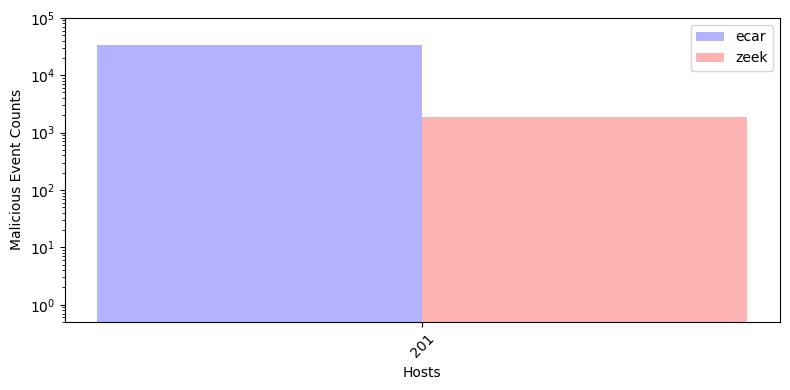

In [7]:
# Plotting
plt.rcParamsDefault.update({'font.size': 12})
x = np.arange(len(hosts))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))

# Updated colors: vivid but decent
bars_hids = ax.bar(x - width/2, malicious_counts_hids, width, label='ecar', color='#B2B2FF')
bars_nids = ax.bar(x + width/2, malicious_counts_nids, width, label='zeek', color='#FFB2B2') 

# Add labels, title, and legend
ax.set_xlabel('Hosts')
ax.set_ylabel('Malicious Event Counts')
ax.set_xticks(x)
ax.set_xticklabels(hosts)
ax.legend()
ax.set_yscale('log')
ax.set_ylim(bottom=0.5, top=1e5)
plt.xticks(rotation=45)
fig.tight_layout()
fig.savefig("plots/malicious_counts.pdf", bbox_inches='tight')
plt.show()

In [8]:
import plotly.graph_objects as go

transition = [[0.8, 0.2, 0., 0.], [0., 0., 1., 0.], [0.5, 0.25, 0, 0.25]]
volume = [100, 20, 10]
label = [
        "Target Host,<br>Initial Phase",
        "Target Host,<br>Evaluation Phase", 
        "External Hosts<br>Malicious",
        "Train",
        "Validation",
        "Test",
        "Remaining<br>External Hosts"]


In [12]:

transition = [[0.8, 0.2, 0., 0.], [0., 0., 1., 0.], [0.5, 0.25, 0, 0.25]]
volume = [100, 20, 10]
label = [
        "Target Host,<br>Initial Phase",
        "Target Host,<br>Evaluation Phase", 
        "External Hosts<br>Malicious",
        "Train",
        "Validation",
        "Test",
        "Remaining<br>External Hosts"]
# Define source and target indices for the Sankey diagram
sources = []
targets = []
values = []

# Map transitions from the first three labels to the last three (Train, Validation, Test)
for i, row in enumerate(transition):
    for j, frac in enumerate(row):
        if frac > 0:
            sources.append(i)
            targets.append(3 + j)
            values.append(volume[i] * frac)

# Define muted colors for nodes and links (background-friendly, thesis style)
node_colors = [
    "#82B9E6",  # Target Host, Initial Phase (muted blue)
    "#D3B28C",  # Target Host, Evaluation Phase (muted beige)
    "#A1D193",  # External Hosts Malicious (muted green)
    "#A3D8F4",  # Train (soft blue)
    "#5789A3",  # Validation (soft yellow-orange)
    "#D3B28C",  # Test (soft green)
    "#A1D193"   # Remaining External Hosts (soft pink)
]

# Muted versions of the source node colors for links
link_colors = [
    "#B5D3EC", "#B5D3EC",  # from node 0 (muted blue)
    "#E2CBA8",             # from node 1 (muted beige)
    "#C3E2B8", "#C3E2B8", "#C3E2B8"  # from node 2 (muted green)
]

# Define manual vertical (y) positions for each node (0 = top, 1 = bottom)
# Adjust to your desired visual order

# Make the distance between source and target smaller by adjusting node_x
node_x = [0.0, 0.0, 0.0, 0.7, 0.7, 0.7, 0.7]  # Move targets closer to sources

# Update your Sankey chart with `x` and `y`
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=10,  # Reduce padding for a more compact layout
        thickness=15,  # Reduce thickness for a smaller appearance
        line=dict(color="gray", width=0.5),
        label=label,
        color=node_colors,
        x=node_x
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors
    ))])

fig.update_layout(
    font_size=11,
    plot_bgcolor='white',
    paper_bgcolor='white',
    width=900,
    height=400,
    margin=dict(l=10, r=10, t=10, b=10)
)

fig.write_image("plots/sankey_compact.pdf", format="pdf", width=600, height=350, scale=2)
fig.show()

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
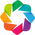

:Sankey   [start,end]   (Value)

In [45]:
import holoviews as hv
hv.extension('bokeh')


# Input data
transition = [[0.8, 0.2, 0., 0.], 
              [0., 0., 1., 0.], 
              [0.5, 0.25, 0, 0.25]]
volume = [100, 20, 10]

# Labels
source_labels = [
    "Target Host, Initial Phase",
    "Target Host, Evaluation Phase", 
    "External Hosts Malicious"
]
target_labels = [
    "Train",
    "Validation",
    "Test",
    "Remaining External Hosts"
]
# Define muted colors for nodes and links (background-friendly, thesis style)
node_colors = [
    "#82B9E6",  # Target Host, Initial Phase (muted blue)
    "#D3B28C",  # Target Host, Evaluation Phase (muted beige)
    "#A1D193",  # External Hosts Malicious (muted green)
    "#A3D8F4",  # Train (soft blue)
    "#5789A3",  # Validation (soft yellow-orange)
    "#D3B28C",  # Test (soft green)
    "#A1D193"   # Remaining External Hosts (soft pink)
]

# Muted versions of the source node colors for links
link_colors = [
    "#B5D3EC", "#B5D3EC",  # from node 0 (muted blue)
    "#E2CBA8",             # from node 1 (muted beige)
    "#C3E2B8", "#C3E2B8", "#C3E2B8"  # from node 2 (muted green)
]
# Construct Sankey edge list
edges = []
for i, row in enumerate(transition):
    for j, frac in enumerate(row):
        if frac > 0:
            from_node = source_labels[i]
            to_node = target_labels[j]
            weight = volume[i] * frac
            edges.append((from_node, to_node, weight))
            # Add edge color to each edge using link_colors
            for idx, edge in enumerate(edges):
                edges[idx] = edge + (link_colors[idx],)
# Create Sankey diagram
sankey = hv.Sankey(edges).opts(
    width=800, height=500,
    labels='index',
    node_color=node_colors,
    label_position='left',
    title='Sankey Diagram of Data Transitions'
)

sankey